In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [2]:
print(pc.__version__)

0.9.16b3


In [3]:
# We tell pyCloudy where the executable is:
pc.config.cloudy_exe = '/usr/local/Cloudy/c25.00_rc2/source/cloudy.exe'

You need to create the ../models directory. This is where we will put the input and output files for Cloudy.

In [4]:
!mkdir ../models

mkdir: ../models: File exists


In [27]:
# An object is created (instatiated). It is in charge of the Cloudy input file. 
# Give the name of the model when instantiate the Class to the Min object.
Min = pc.CloudyInput('../models/M16')

In [ ]:
# Some parameters of the models are transimted to the Min object.
# The ionizing SED is a Blackbody in this example. Other SEDs can also be defined, see set_star method.
Min.set_BB(Teff=48700, lumi_unit='Q(H)', lumi_value=49.70)
# A constant density is used.
Min.set_cste_density(3)
# The inner radius is given (a second argument can set the outer radius)
Min.set_radius(18.78)
# Cloudy predefined abundance set is asumed. Element by element abundance can also be defined, using a dictionnary.
Min.set_abund(predef='ISM', nograins=False)
Min.set_iterate()
# Anything that is not available by dedicated method can always be done using the "set_other" method.
Min.set_other(('Cosmic Rays Background', 
               'CMB', 
               'constant pressure'))
Min.set_emis_tab(('H  1      4861.32A',
                  'O  1      6300.30A',
                  'Blnd      3727.00A',
                  'O  3      5006.84A'))
#Min.set_other(('set dr 0'))
# Stoping criteria can be defined.
#Min.set_stop(('zone = 1'))

In [29]:
# Once all the model parameters have been defined suing the collection of "set_" methods, the input file is printed out.
Min.print_input()

In [30]:
!cat ../models/M16.in

#####################################
title M16
#####################################
set punch prefix "M16"
Blackbody 48700.000000
Q(H) = 49.700
radius = 18.780
hden = 3.000
filling factor = 1.0
abundances ism
iterate
Cosmic Rays Background
CMB
constant pressure
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last grain temperature ".gtemp"
save last grain abundances ".gabund"
save last grain D/G ratio ".gdgrat"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"
save last lines emissivity  ".emis"
H  1      4861.32A
O  1      6300.30A
Blnd    

In [31]:
# The list of the saved file can be edited.
pc.config.SAVE_LIST

[['radius', '.rad'],
 ['continuum', '.cont'],
 ['physical conditions', '.phy'],
 ['overview', '.ovr'],
 ['heating', '.heat'],
 ['cooling', '.cool'],
 ['optical depth', '.opd']]

In [32]:
# The list of elements for which we save the ionic fractions can also be changed
print(pc.config.SAVE_LIST_ELEMS)
pc.config.SAVE_LIST_ELEMS.remove(['chlorin', '.ele_Cl'])
print('-------------')
print(pc.config.SAVE_LIST_ELEMS)

[['hydrogen', '.ele_H'], ['helium', '.ele_He'], ['carbon', '.ele_C'], ['nitrogen', '.ele_N'], ['oxygen', '.ele_O'], ['argon', '.ele_Ar'], ['neon', '.ele_Ne'], ['sulphur', '.ele_S'], ['iron', '.ele_Fe'], ['silicon', '.ele_Si']]


ValueError: list.remove(x): x not in list

In [33]:
# The list of the saved file related tothe grains can also be edited.
pc.config.SAVE_LIST_GRAINS

[['grain temperature', '.gtemp'],
 ['grain abundances', '.gabund'],
 ['grain D/G ratio', '.gdgrat']]

In [34]:
# We can run Cloudy from within the script:
Min.run_cloudy()

In [35]:
!ls -l ../models/M16.*

-rw-r--r--  2 christophemorisset  staff  1004348 Jul 31 16:02 ../models/M16.cont
-rw-r--r--  2 christophemorisset  staff    26231 Jul 31 16:02 ../models/M16.cool
-rw-r--r--  2 christophemorisset  staff    29732 Jul 31 16:02 ../models/M16.ele_Ar
-rw-r--r--  2 christophemorisset  staff    20992 Jul 31 16:02 ../models/M16.ele_C
-rw-r--r--  1 christophemorisset  staff    41372 Jul 31 16:02 ../models/M16.ele_Fe
-rw-r--r--  1 christophemorisset  staff     6455 Jul 31 16:02 ../models/M16.ele_H
-rw-r--r--  2 christophemorisset  staff     6459 Jul 31 16:02 ../models/M16.ele_He
-rw-r--r--  1 christophemorisset  staff    13721 Jul 31 16:02 ../models/M16.ele_N
-rw-r--r--  1 christophemorisset  staff    18092 Jul 31 16:02 ../models/M16.ele_Ne
-rw-r--r--  2 christophemorisset  staff    19536 Jul 31 16:02 ../models/M16.ele_O
-rw-r--r--  2 christophemorisset  staff    26805 Jul 31 16:02 ../models/M16.ele_S
-rw-r--r--  2 christophemorisset  staff    23912 Jul 31 16:02 ../models/M16.ele_Si
-rw-r--r--  2

In [2]:
# The output files for the M1 model are read by the CloudyModel object when instantiating it.
# The cloudy_version_major=24 is only for the pre-release of c24 during the Tokyo school
M = pc.CloudyModel('../models/M16', read_emis=True)

warng CloudyModel ../models/M16: ../models/M16.ele_Cl does not exist.


In [3]:
# The M object includes a lot of methods to deal with the data saved in the Cloudy model output files.
# A method can give a summary of the model, to check that the results are close to what expected.
M.print_stats()

 Name of the model: ../models/M16
 R_in (cut) = 6.026e+18 (6.026e+18), R_out (cut) = 6.262e+18 (6.262e+18)
 Depth_in (cut) = 0.000e+00 (4.931e+12), depth_out (cut) = 2.365e+17 (2.365e+17)
 H+ mass = 9.34e+01, H mass = 9.90e+01 N zones: 161
 <H+/H> = 0.98, <He++/He> = 0.00, <He+/He> = 0.97
 <O+++/O> = 0.00, <O++/O> = 0.59, <O+/O> = 0.39
 <N+++/N> = 0.01, <N++/N> = 0.69, <N+/N> = 0.29
 T(O+++) = 8048, T(O++) = 8000, T(O+) = 8538
 <ne> = 1088,  <nH> = 1048, T0 = 8222, t2=0.0059
 <log U> = -2.47


In [4]:
# The abundances used in the model are stored into a dictionary.
print(M.abund)

{'H': 0.0, 'He': -1.0088, 'Li': -10.2676, 'B': -10.0506, 'C': -3.6003, 'N': -4.1002, 'O': -3.4962, 'F': -7.699, 'Ne': -3.9101, 'Na': -6.5003, 'Mg': -4.8996, 'Al': -7.1002, 'Si': -5.5003, 'P': -6.7959, 'S': -4.4895, 'Cl': -7.0, 'Ar': -5.5498, 'K': -7.9586, 'Ca': -9.3872, 'Ti': -9.2366, 'V': -10.0, 'Cr': -8.0, 'Mn': -7.6383, 'Fe': -6.2, 'Co': -8.2291, 'Ni': -7.7399, 'Cu': -8.8239, 'Zn': -7.699}


In [5]:
# Part of the main Cloudy model output file are extracted from the file and stored into a dictionary.
M.out

{'Cloudy ends': ' Cloudy ends: 161 zones, 2 iterations, 1 caution. (single thread) ExecTime(s) 229.51\n',
 'stop': '   Calculation stopped because lowest Te reached. Iteration 2 of 2\n',
 'Blackbody': '                       * Blackbody 48700.000000                                                          *\n',
 'hden': '                       * hden = 3.000                                                                    *\n',
 'iterate': '                       * iterate                                                                         *\n',
 'SED1': '           L(nu>1ryd):  39.2070   Average nu:1.474E+00   L( X-ray):  15.2203   L(BalC):  39.0910     Q(Balmer C):  49.9690\n',
 'SED2': '           Q(1.0-1.8):  49.6127   Q(1.8-4.0):  48.9587   Q(4.0-20):  46.4834   Q(20--):  24.5626     Ion pht flx:1.098E+11\n',
 'SED3': '           L(gam ray):   0.0000   Q(gam ray):   0.0000   L(Infred):  37.8021   Alf(ox):   0.0000     Total lumin:  39.4634\n',
 'SED4': '           log L/Lsun

In [6]:
# Comments, cautions and warnings are also available.
print(M.comments)
print('-----------------')
print(M.cautions)
print('-----------------')
print(M.warnings)

[]
-----------------
[' C-The radiation pressure jumped by 353% from 2.69e-11 (zone 20) to 4.49e-12 (zone 21) to 4.81e-12 (zone 22)\n', ' C-The radiation pressure jumped by 552% from 1.75e-15 (zone 157) to 1.41e-15 (zone 158) to 1.38e-14 (zone 159)\n']
-----------------
['  !Charge transfer H => H+ reached 3756.3% of the local H ionization rate.\n', '  !Continuum zero at some energies.\n', '  !AGE: Cloud age was not set.  Longest timescale was 2.32e+11 s = 7.34e+03 years.\n', '  !Isotropic continuum subtraction significantly affects line intensities\n', '  !Charge transfer H => H+ reached 3749.1% of the local H ionization rate.\n', '  !Continuum zero at some energies.\n', '  !AGE: Cloud age was not set.  Longest timescale was 2.32e+11 s = 7.35e+03 years.\n', '  !Isotropic continuum subtraction significantly affects line intensities\n']


In [7]:
# The mean of the ionization parameter over the volume of the nebula is available. 
# It may be weighted by the electron density (useful if the model goes into the neutral region).
print(M.log_U_mean, M.log_U_mean_ne)

-2.4666617612748745 -2.4655991962986543


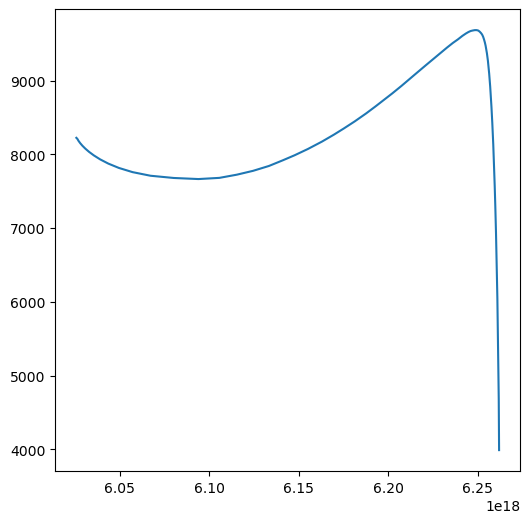

In [8]:
# Most of the radial varying parameters are easily accessed and ploted.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.te);

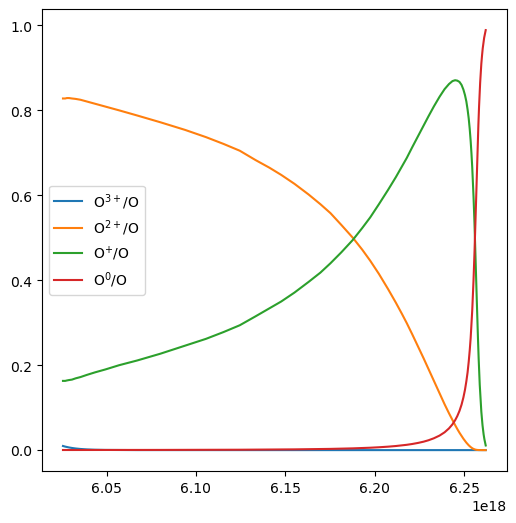

In [10]:
# Ionic fraction of any element are accessible to be ploted versus the radius of the nebula.
f, ax = plt.subplots(figsize=(6,6))
ax.plot(M.radius, M.get_ionic('O',3), label=r'O$^{3+}$/O')
ax.plot(M.radius, M.get_ionic('O',2), label=r'O$^{2+}$/O')
ax.plot(M.radius, M.get_ionic('O',1), label=r'O$^{+}$/O')
ax.plot(M.radius, M.get_ionic('O',0), label=r'O$^{0}$/O')
ax.legend(loc='best');

In [11]:
# Electron temeprature weighted by ionic fraction and electron density are also available.
print(r'<Te>$_{O^0/O.Ne}$ =', M.get_T0_ion_vol_ne('O',0))
print(r'<Te>$_{O^+/O.Ne}$ =', M.get_T0_ion_vol_ne('O',1))
print(r'<Te>$_{O^{2+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',2))
print(r'<Te>$_{O^{3+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',3))

<Te>$_{O^0/O.Ne}$ = 8577.907546278144
<Te>$_{O^+/O.Ne}$ = 8537.70746570413
<Te>$_{O^{2+}/O.Ne}$ = 7999.945707185461
<Te>$_{O^{3+}/O.Ne}$ = 8047.874437213355


In [12]:
# Ionic fractions (weighted by Ne or not)
print(M.get_ab_ion_vol('O',2))
print(M.get_ab_ion_vol_ne('O',2))

0.5531332139799124
0.5887435403985961


In [13]:
# A ploting tool to visualize the spectra is available.
help(M.plot_spectrum)
print('---------------')
help(M.get_cont_x)
print('---------------')
help(M.get_cont_y)

Help on method plot_spectrum in module pyCloudy.c1d.cloudy_model:

plot_spectrum(xunit='eV', cont='ntrans', yunit='es', ax=None, xlog=True, ylog=True, **kargv) method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    plot the spectrum of the model.
    parameters:
        - xunit ['eV']. See get_cont_y for details
        - cont ['ntrans']. See get_cont_y for details
        - yunit ['es']. See get_cont_y for details
        - ax: axis matplotlib object
        - xlog [True]
        - ylog [True]
        - **kargv passed to the plot.

---------------
Help on method get_cont_x in module pyCloudy.c1d.cloudy_model:

get_cont_x(unit='Ryd') method of pyCloudy.c1d.cloudy_model.CloudyModel instance
    param:
        unit : one of ['Ryd','eV','Ang','mu','cm-1','Hz', 'kHz', 'MHz', 'GHz']
    return:
        continuum X: wavelength, energys, wv number, or frequency

---------------
Help on method get_cont_y in module pyCloudy.c1d.cloudy_model:

get_cont_y(cont='incid', unit='es', dist_norm=

(0.0, 100000.0)

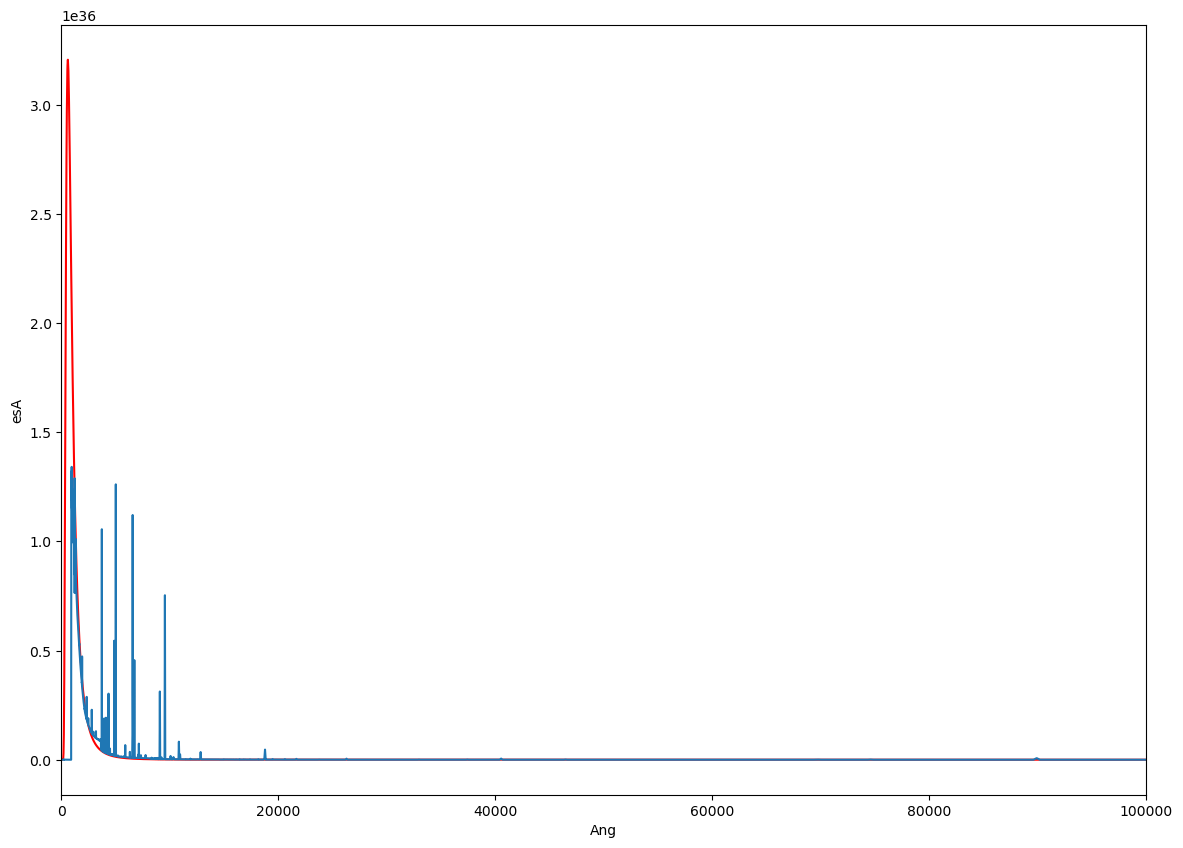

In [14]:
# The area under the red curve and under the blue curve are the same (in IR the blue curve is slightly over the red one)
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA', xlog=False, ylog=False)
M.plot_spectrum(cont='ntrans', ax=ax, xunit='Ang', yunit='esA', xlog=False, ylog=False)
ax.set_xlim((0, 1e5))

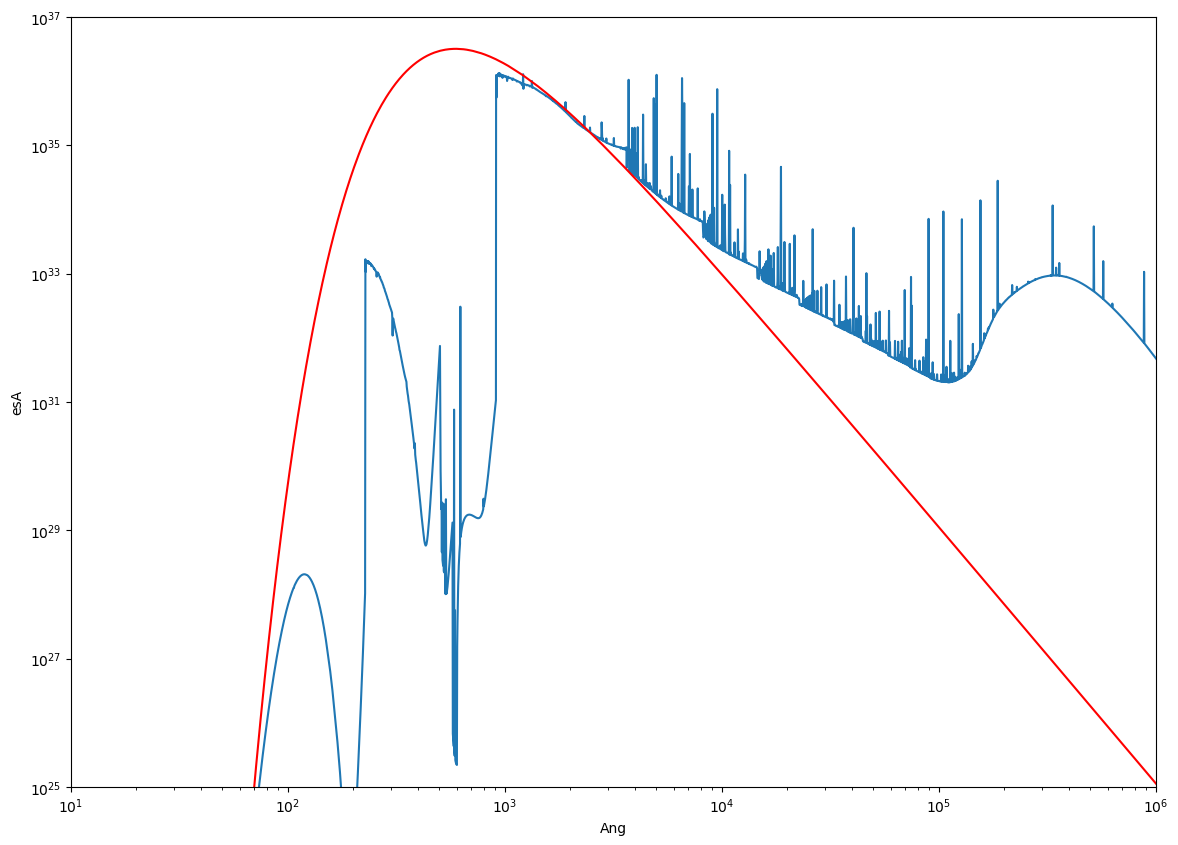

In [18]:
f, ax = plt.subplots(figsize=(14,10))
M.plot_spectrum(ax=ax, xunit='Ang', yunit='esA')
M.plot_spectrum(cont='incid', ax=ax, c='r', xunit='Ang', yunit='esA')
ax.set_xlim((1e1, 1e6))
ax.set_ylim((1e25, 1e37));

# Grid of models

In [28]:
# A function is used to produce input file dpeending on a given parameter, here the inner radius.
def make_model(name, radius):
    # The name of the model must depend on the varying parameter, to avoid overwriting of the files
    Min = pc.CloudyInput('../models/{}_{}'.format(name, radius)) 
    Min.set_BB(Teff=43600, lumi_unit='Q(H)', lumi_value=49.34)
    Min.set_cste_density(4)
    Min.set_radius(radius)
    Min.set_abund(predef='ism', nograins=False)
    Min.set_other(('Cosmic Rays Background'))
    #Min.set_other(('set dr 0'))
    #Min.set_stop(('zone = 1'))    
    Min.print_input() #We do not run the model, only print the input file

In [29]:
# A grid of 6 model input files is done.
name = 'M1'
for radius in np.linspace(13, 23,6):
    make_model(name, radius)

In [30]:
# This will create a Makefile in the model directory
# The make command is used to run the models in parallel
pc.print_make_file('../models')

In [31]:
!cat ../models/Makefile

CLOUDY = /usr/local/Cloudy/cloudy-Tokyo24/source/cloudy.exe

SRC = $(wildcard ${name}*.in)
OBJ = $(SRC:.in=.out)

# Usage: make -j N name='NAME'
# N is the number of processors
# optional: NAME is a generic name, all models named NAME*.in will be run
# C. Morisset

all: $(OBJ)

%.out: %.in
	-$(CLOUDY) -p  $(basename $< )
# Notice the previous line has TAB in first column


In [32]:
# The 6 models are run using the Makefile
pc.run_cloudy(dir_='../models', n_proc=6, use_make=True)

make: [M1_15.0.out] Error 2 (ignored)
make: [M1_13.0.out] Error 2 (ignored)


In [33]:
# The models are read into a list of CloudyModel objects
Ms = pc.load_models('../models/M1_', read_emis=False, cloudy_version_major=24)

In [34]:
# The list is sorted according to the inner radius
Ms = sorted(Ms, key = lambda M:M.r_in)

In [35]:
# It is very easy to loop on any of the model parameters. Here we explore the string describing how Cloudy ended.
for M in Ms:
    print(M.model_name_s, M.out['Cloudy ends'])

M1_13.0  Cloudy ends: 436 zones, 1 iteration, 20 warnings, 2 cautions. (single thread) ExecTime(s) 292.75

M1_15.0  Cloudy ends: 319 zones, 1 iteration, 16 warnings, 3 cautions. (single thread) ExecTime(s) 261.71

M1_17.0  Cloudy ends: 214 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 227.33

M1_19.0  Cloudy ends: 114 zones, 1 iteration, 1 caution. (single thread) ExecTime(s) 92.53

M1_21.0  Cloudy ends: 1 zone, 1 iteration, 6 cautions. (single thread) ExecTime(s) 28.79

M1_23.0  Cloudy ends: 1 zone, 1 iteration, 6 cautions. (single thread) ExecTime(s) 81.08



In [36]:
# Using list comprehension, it is easy to generate tables of the varying parameters.
print('Inner R', ['{:8.2f}'.format(np.log10(M.r_in)) for M in Ms])
print('Outer R', ['{:8.2f}'.format(np.log10(M.r_out)) for M in Ms])
print('<Te>   ', ['{:8.2f}'.format(M.T0) for M in Ms])
print('<logU> ', ['{:8.2f}'.format(M.log_U_mean_ne) for M in Ms])
print('H0/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',0)) for M in Ms])
print('H+/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',1)) for M in Ms])
print('H2/H   ', ['{:8.2f}'.format(2*M.get_ab_ion_vol_ne('H',2)) for M in Ms])
print('O++/O  ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('O',2)) for M in Ms])

Inner R ['   13.00', '   15.00', '   17.00', '   19.00', '   21.00', '   23.00']
Outer R ['   17.38', '   17.38', '   17.47', '   19.00', '   21.00', '   23.00']
<Te>    ['10539.60', '10535.57', '10004.11', ' 8084.41', '  370.01', '    3.43']
<logU>  ['   -0.50', '   -0.51', '   -0.86', '   -4.24', '   -8.24', '  -12.24']
H0/H    ['    0.01', '    0.01', '    0.01', '    0.25', '    0.97', '    0.01']
H+/H    ['    0.99', '    0.99', '    0.99', '    0.75', '    0.01', '    0.00']
H2/H    ['    0.00', '    0.00', '    0.00', '    0.00', '    0.02', '    0.98']
O++/O   ['    0.90', '    0.90', '    0.91', '    0.00', '    0.00', '    0.00']


In [37]:
# In case of models where only one zone has been run, a special treatment is needed
Tinit = [M.te if M.te.ndim==0 else M.te[0] for M in Ms]
print('Te_init', ['{:8.2f}'.format(Ti) for Ti in Tinit])

Te_init ['41328.00', '21441.00', '11964.00', ' 8491.10', '  370.01', '    3.43']


(10, 100000000.0)

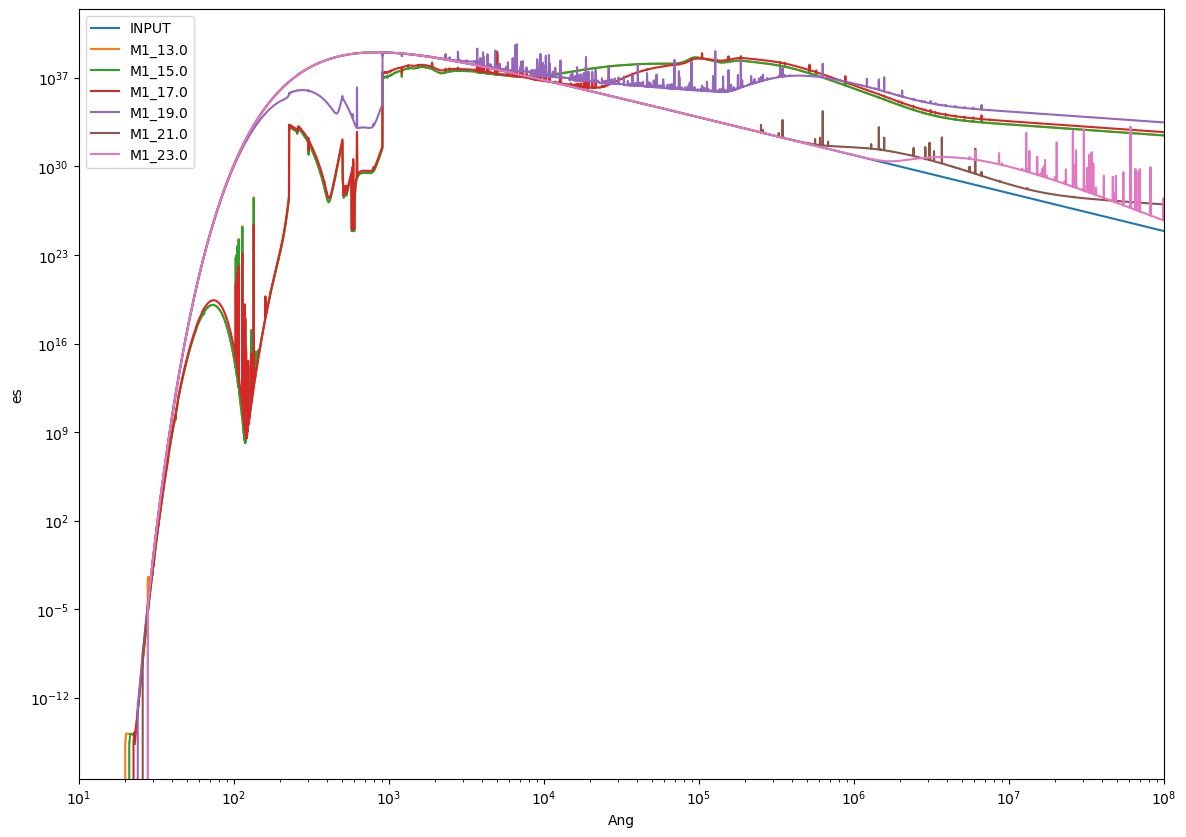

In [38]:
# Overplotting of the spectra of all the models is easy obtained
f, ax = plt.subplots(figsize=(14, 10))
M.plot_spectrum(label='INPUT', ax=ax, xunit='Ang', cont='incid')
for M in Ms:
    M.plot_spectrum(label=M.model_name_s, ax=ax, xunit='Ang')
ax.legend()
ax.set_xlim((10, 1e8))